In [16]:
pip install iso3166

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
df_missions = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_missions?
* How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of missions that took place per decade?

In [5]:
df_missions.shape
df_missions.columns
df_missions.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### Check Remove Nan Values

In [6]:
df_missions.isna().values.any() #True
df_missions.duplicated().values.any()
df_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
nan_rows = df_missions[df_missions.Price.isna()]
df_missions_clean = df_missions.dropna()
print(df_missions.shape)
print(df_missions_clean.shape)

(4324, 9)
(964, 9)


### Check and remove Duplicates


In [8]:
df_missions_clean.duplicated().values.any() #False
# df_missions_clean.drop_duplicates() #This is how to drop duplicates

False

In [9]:
clean_df = df_missions_clean.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df_data = clean_df

In [10]:
clean_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


# Finding Most Expensive Missions


In [11]:
clean_df.sort_values('Price', ascending=True)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure
3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 14, 1973 17:30 UTC",Saturn V | Skylab 1,StatusRetired,"1,160.0",Success
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.0",Success
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success
3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success
...,...,...,...,...,...,...,...
510,MHI,"LA-Y1, Tanegashima Space Center, Japan","Thu Mar 26, 2015 01:21 UTC",H-IIA 202 | IGS-Optical 5,StatusActive,90.0,Success
365,MHI,"LA-Y1, Tanegashima Space Center, Japan","Fri Mar 17, 2017 01:20 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,90.0,Success
146,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 11, 2019 22:35 UTC",Falcon Heavy | ArabSat 6A,StatusActive,90.0,Success
236,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Jun 12, 2018 04:20 UTC",H-IIA 202 | IGS Radar-6,StatusActive,90.0,Success


In [12]:
clean_df['Mission_Status'].unique()
clean_df.groupby('Mission_Status').value_counts()

Mission_Status  Organisation  Location                                                 Date                        Detail                                            Rocket_Status  Price
Failure         Arianespace   ELA-3, Guiana Space Centre, French Guiana, France        Wed Dec 11, 2002 22:22 UTC  Ariane 5 ECA | Hot Bird 7, Stentor, MFD-A, MFD-B  StatusActive   200.0    1
                              ELV-1 (SLV), Guiana Space Centre, French Guiana, France  Thu Jul 11, 2019 01:53 UTC  Vega | Falcon Eye 1                               StatusActive   37.0     1
                US Air Force  SLC-20, Cape Canaveral AFS, Florida, USA                 Tue Sep 01, 1964 15:00 UTC  Titan IIIA | Transtage 1                          StatusRetired  63.23    1
                              SLC-4W, Vandenberg AFB, California, USA                  Wed Apr 26, 1967            Titan IIIB | OPS 4243                             StatusRetired  59.0     1
                VKS RF        Site 81/24, Baikonur

# Number of Successfull Missions versus Failed

In [13]:
mission_status = clean_df["Mission_Status"].value_counts()
mission_status

Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64

<Axes: xlabel='Mission_Status'>

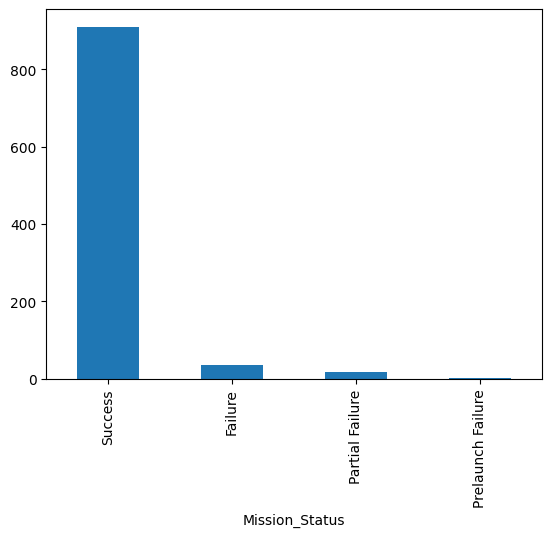

In [14]:
mission_status.plot(kind='bar')


# How Expensive are the Launches?

In [15]:
px.histogram(clean_df.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10)

# Use a Choropleth Map to Show the Number of Launches by CountryUse a Choropleth Map to Show the Number of Launches by Country

In [17]:
import iso3166
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,CHN


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [22]:
money_spent = df_data[df_data["Price"].notna()]
money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)
money_spent.groupby("Organisation")["Price"].sum()

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

In [23]:
total_money_spent = money_spent.groupby("Organisation")["Price"].sum()

fig = px.bar(total_money_spent, x=total_money_spent.index, y="Price",
             title="Total amount of money spent by organisation on space missions",
             color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(
    xaxis_title="Organisation",
    yaxis_title="Price (USD) in millions",
)
fig.show()


# Chart the Number of Launches per Year

In [24]:
df_data['date'] = pd.to_datetime(df_data['Date'], format='mixed')
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)

ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year',
    'count'
]
fig = px.bar(
    ds,
    x='year',
    y="count",
    orientation='v',
    title='Missions number by year'
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=ds['year'].min(),
        dtick=1,
        )
    )
fig.show()

# How has the Launch Price varied Over Time?

In [ ]:
avg_price = df_data[df_data["Price"].notna()]
avg_price["Price"].str.replace(',', '').astype(float)
avg_price = avg_price.sort_values(by='Price')
avg_price

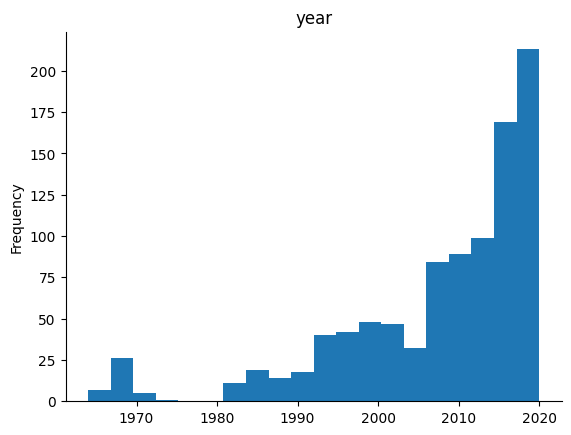

In [25]:
avg_price['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)